In [31]:
from pathlib import Path
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [2]:
JPHACKS_dir = Path('/home/qiushi/workspace/JPHACKS/')
avipath = Path('/home/qiushi/workspace/JPHACKS/input/cLgEcNPr-ZE.mp4.avi')

In [3]:
cap = cv2.VideoCapture(str(avipath))

In [4]:
cap.get(cv2.CAP_PROP_FPS)

0.0

In [135]:
workdir = Path('/home/jphacks/LipNet-JP/')
youtube_id = '1'
# youtube_id = '2'
spk = 's{}'.format(youtube_id)
txtpath = workdir / 'data/align' / 'output{}word.align'.format(youtube_id)
aligned_lm_path = Path('/home/jphacks/LipNet-JP/data/processed2/{0}/{0}_aligned.csv'.format(youtube_id))
lm_path = Path('/home/jphacks/LipNet-JP/data/processed/{0}/{0}.csv'.format(youtube_id))
croppeddir = Path('/home/jphacks/LipNet-JP/data/processed2/{0}/{0}_aligned_aligned_cropped'.format(youtube_id))
assert croppeddir.exists()

datadir = Path('/home/jphacks/LipNet-JP/data')
videodir = datadir / 'lip_video'
txtdir = datadir / 'align_txt'
lm_df = pd.read_csv(str(aligned_lm_path))
# landmarkpath = Path('/home/qiushi/workspace/JPHACKS/output/processed/cLgEcNPr-ZE.mp4.csv')
# lm_df = pd.read_csv(lm_path)

lm_df['timestamp'] = (lm_df['frame'] - 1) * (1/30)
letters = ['A', 'I', 'U', 'E', 'O', 'N']
with open(txtpath, 'r') as f:
    txt = json.load(f)
lm_df['target'] = -1
for word in txt:
    for c in word:
        lm_df.loc[(lm_df.timestamp >= c['start']) & (lm_df.timestamp < c['end']), 'target'] \
        = letters.index(c['word'].upper())

In [136]:
## 話していないときのデータを削除
lm_df = lm_df[lm_df['target'] != -1]

In [137]:
# Pipeline copy
lm_df_pipe = lm_df.copy()

In [138]:
# Pipeline copy
lm_df = lm_df_pipe.copy()

In [7]:
lm_df['frame'].max() / 30 / 60

4.91

# 外れ値を除外する

## 手順
- 再瀕値を出す
- その前後+-0.3をリストアップする
- グラフでその出現を可視化する

<!-- ![img](./assets/Rotation_explained.png) -->
<img src="./assets/Rotation_explained.png" alt="Drawing" style="width: 400px;"/>

### poseRx

count    8838.000000
mean        0.035692
std         0.148358
min        -2.815000
25%        -0.038000
50%         0.007000
75%         0.082000
max         0.837000
Name:  pose_Rx, dtype: float64

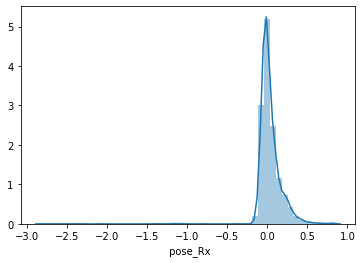

In [8]:
sns.distplot(lm_df[' pose_Rx'])
lm_df[' pose_Rx'].describe()

### poseRy

count    8838.000000
mean        0.082239
std         0.143155
min        -0.401000
25%         0.005000
50%         0.064000
75%         0.149000
max         1.401000
Name:  pose_Ry, dtype: float64

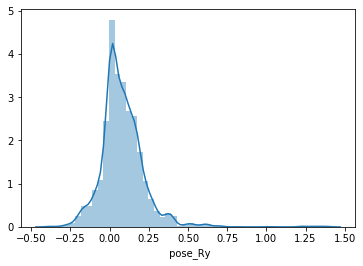

In [9]:
sns.distplot(lm_df[' pose_Ry'])
lm_df[' pose_Ry'].describe()

### poseRz

count    8838.000000
mean        0.008462
std         0.090222
min        -0.143000
25%        -0.004000
50%         0.003000
75%         0.014000
max         2.900000
Name:  pose_Rz, dtype: float64

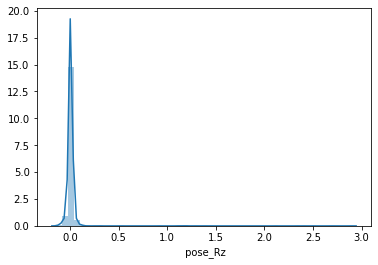

In [10]:
sns.distplot(lm_df[' pose_Rz'])
lm_df[' pose_Rz'].describe()

In [11]:
def get_valid_ranged_flag(ser: pd.Series, threshold: int = 1) -> pd.Series:
    _mean, _std = ser.mean(), ser.std()
    _min = 0 - (_std * threshold)
    _max = 0 + (_std * threshold)
    return ((ser > _min) & (ser < _max)) * 1

In [12]:
lm_df[' pose_Rx_valid'] = get_valid_ranged_flag(lm_df[' pose_Rx'], 4)
lm_df[' pose_Ry_valid'] = get_valid_ranged_flag(lm_df[' pose_Ry'], 2)
lm_df[' pose_Rz_valid'] = get_valid_ranged_flag(lm_df[' pose_Rz'], 4.3)
print(
    sum(lm_df[' pose_Rx_valid']),
    sum(lm_df[' pose_Ry_valid']),
    sum(lm_df[' pose_Rz_valid']),
)

8777 8332 8815


In [13]:
lm_df[[' pose_Rx_valid', ' pose_Ry_valid', ' pose_Rz_valid']].values.shape

(8838, 3)

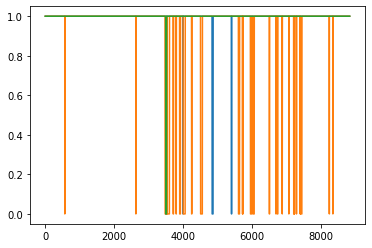

In [14]:
x = np.arange(len(lm_df))
sns.lineplot(x, lm_df[' pose_Rx_valid'].values)
sns.lineplot(x, lm_df[' pose_Ry_valid'].values)
sns.lineplot(x, lm_df[' pose_Rz_valid'].values)

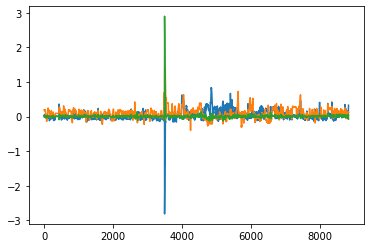

In [15]:
x = np.arange(len(lm_df))
sns.lineplot(x, lm_df[' pose_Rx'].values)
sns.lineplot(x, lm_df[' pose_Ry'].values)
sns.lineplot(x, lm_df[' pose_Rz'].values)

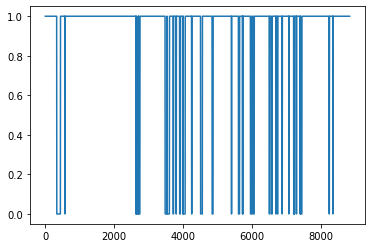

In [16]:
x = np.arange(len(lm_df))
sns.lineplot(x, (lm_df[' pose_Rx_valid'] * lm_df[' pose_Ry_valid'] * lm_df[' pose_Rz_valid'] * lm_df[' success']).values)

In [17]:
lm_df[3474:3574]

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,...,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,pose_Rx_valid,pose_Ry_valid,pose_Rz_valid
3474,3475,0,0.0,0.98,1,0.096317,0.405609,-0.908958,-0.256298,0.374207,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1,1
3475,3476,0,0.0,0.98,1,0.074959,0.380211,-0.921857,-0.271346,0.377205,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1,1,1
3476,3477,0,0.0,0.98,1,0.051092,0.359448,-0.931766,-0.320889,0.353386,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,1
3477,3478,0,0.0,0.98,1,-0.196798,0.303837,-0.932177,-0.383756,0.352871,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,1
3478,3479,0,0.0,0.98,1,-0.186917,0.329085,-0.925616,-0.496257,0.356334,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3569,3570,0,0.0,0.03,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
3570,3571,0,0.0,0.03,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
3571,3572,0,0.0,0.03,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
3572,3573,0,0.0,0.03,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1


In [18]:
lm_df[3474:3574][[' pose_Rx', ' pose_Ry', ' pose_Rz', ' pose_Rx_valid', ' pose_Ry_valid', ' pose_Rz_valid', ' success']].head(50)

,pose_Rx,pose_Ry,pose_Rz,pose_Rx_valid,pose_Ry_valid,pose_Rz_valid,success
3474,0.079,0.127,0.012,1,1,1,1
3475,0.057,0.182,0.024,1,1,1,1
3476,0.045,0.268,0.028,1,1,1,1
3477,0.050,0.379,0.019,1,0,1,1
3478,0.079,0.508,0.025,1,0,1,1
3479,0.112,0.602,0.016,1,0,1,1
3480,0.135,0.628,-0.004,1,0,1,1
3481,0.204,0.684,-0.042,1,0,1,1
3482,0.239,0.692,-0.072,1,0,1,1
3483,0.250,0.690,-0.100,1,0,1,1


## 正規化

### 口を中心にランドマークを正規化する

In [139]:
# Pipeline copy
lm_df = lm_df_pipe.copy()

In [140]:
lip_idexies = list(range(48, 68))
lip_x_list = [' x_{}'.format(i) for i in lip_idexies]
lip_y_list = [' y_{}'.format(i) for i in lip_idexies]
lm_df['x_lip_mean'] = lm_df[lip_x_list].mean(axis=1)
lm_df['y_lip_mean'] = lm_df[lip_y_list].mean(axis=1)

In [141]:
for i in range(0, 68):
    lm_df['normx_{}'.format(i)] = lm_df[' x_{}'.format(i)] - lm_df['x_lip_mean']
    lm_df['normy_{}'.format(i)] = lm_df[' y_{}'.format(i)] - lm_df['y_lip_mean']

In [142]:
lm_df[['normx_{}'.format(i) for i in range(0, 68)]]

,normx_0,normx_1,normx_2,normx_3,normx_4,normx_5,normx_6,normx_7,normx_8,normx_9,...,normx_58,normx_59,normx_60,normx_61,normx_62,normx_63,normx_64,normx_65,normx_66,normx_67
8,-74.610,-73.410,-69.510,-63.910,-56.710,-46.210,-33.710,-18.310,2.290,24.690,...,-8.910,-19.510,-22.710,-9.610,-1.810,6.790,28.690,7.790,-1.110,-9.210
9,-74.390,-73.190,-69.190,-63.490,-56.090,-45.190,-32.690,-17.490,2.710,24.810,...,-8.990,-19.390,-22.690,-9.590,-1.890,6.810,28.810,7.610,-1.190,-9.190
10,-74.505,-73.405,-69.605,-64.105,-56.705,-45.905,-33.305,-18.105,1.995,23.895,...,-9.105,-19.805,-23.205,-9.905,-2.005,6.995,29.195,8.095,-1.205,-9.405
11,-74.660,-73.160,-69.260,-63.860,-56.660,-45.860,-33.360,-18.260,2.040,24.240,...,-9.160,-19.960,-23.260,-9.860,-1.960,6.840,29.540,7.940,-1.160,-9.360
12,-74.865,-73.365,-69.465,-63.965,-56.565,-45.565,-32.965,-17.965,1.935,23.735,...,-9.265,-20.065,-23.565,-9.865,-1.965,6.835,30.135,7.835,-1.265,-9.365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8821,-83.360,-82.760,-80.360,-75.960,-68.160,-55.460,-40.460,-22.560,-0.060,23.540,...,-9.660,-21.560,-27.560,-9.660,-0.960,8.840,29.640,9.140,-0.760,-9.560
8822,-82.595,-81.995,-79.595,-75.195,-66.995,-53.895,-38.695,-20.595,2.405,26.805,...,-9.995,-21.795,-27.495,-9.495,-0.795,8.905,29.605,9.105,-0.795,-9.495
8823,-82.655,-82.055,-79.555,-75.055,-66.855,-53.655,-38.455,-20.355,2.445,26.645,...,-10.155,-21.955,-27.555,-9.455,-0.755,9.045,29.545,9.145,-0.755,-9.555
8824,-82.025,-81.825,-79.825,-75.825,-68.225,-55.825,-41.325,-23.625,-1.225,22.575,...,-10.125,-21.825,-27.525,-9.325,-0.825,8.775,29.775,8.875,-0.925,-9.525


In [143]:
# Pipeline copy
lm_df_pipe = lm_df.copy()

## 特徴量作成

### 口の横幅，縦幅

In [144]:
# Pipeline copy
lm_df = lm_df_pipe.copy()

In [147]:
'''
xy51: 唇の上辺
xy57: 唇の下辺
xy48: 唇の左端
xy54: 唇の右端

    51
48      54
    57

'''
# lm_df['lip_width_x'] = lm_df['normx_51'] - lm_df['normx_57']
lm_df['lip_width_y'] = (lm_df['normy_51'] - lm_df['normy_57']) * -1
lm_df['lip_height_x'] = (lm_df['normx_48'] - lm_df['normx_54']) * -1
# lm_df['lip_height_y'] = lm_df['normy_48'] - lm_df['normy_54']

In [148]:
lm_df[[
#     'lip_width_x', 
    'lip_width_y', 
    'lip_height_x', 
#     'lip_height_y'
      ]]

,lip_width_y,lip_height_x
8,32.3,63.0
9,31.6,63.1
10,32.0,64.0
11,32.4,64.3
12,31.8,65.1
...,...,...
8821,25.7,68.2
8822,25.8,68.2
8823,25.9,68.2
8824,25.5,68.5


## LGBMで効果確認

In [149]:
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [150]:
train_df, test_df = train_test_split(
    lm_df[
#         ['normx_{}'.format(i) for i in range(68)] + \
#         ['normy_{}'.format(i) for i in range(68)] + \
#         ['target']
        list(
            set(lm_df.columns) \
            - set(lip_x_list) \
            - set(lip_y_list)
        )
    ],
    test_size=.2, shuffle=True)

In [151]:
train_x = train_df[(set(train_df.columns) - {'target'})].values
train_y = train_df.target.values

test_x = test_df[(set(test_df.columns) - {'target'})].values
test_y = test_df.target.values

In [152]:
model = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
model.fit(train_x, train_y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [153]:
accuracy_score(model.predict(train_x), train_y)

0.9994998749687422

In [154]:
accuracy_score(model.predict(test_x), test_y)

0.651

In [155]:
pred = model.predict(test_x)

class_correct = [0] * len(letters)
class_total = [0] * len(letters)

for p, a in zip(pred, test_y):
    class_total[a] += 1
    if p == a:
        class_correct[a] += 1

for i, l in enumerate(letters):
    print('Accuracy of    {}: {:.4f} ({:4d}/{:4d})'.format(l, class_correct[i]/class_total[i], class_correct[i], class_total[i]))

Accuracy of    A: 0.7702 ( 181/ 235)
Accuracy of    I: 0.6868 ( 125/ 182)
Accuracy of    U: 0.5670 (  55/  97)
Accuracy of    E: 0.5362 (  74/ 138)
Accuracy of    O: 0.7273 ( 168/ 231)
Accuracy of    N: 0.4103 (  48/ 117)


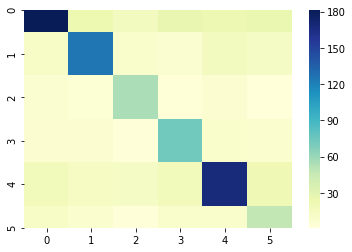

In [159]:
confusion_matrix = np.zeros([len(letters), len(letters)])
for p, a in zip(pred, test_y):
    confusion_matrix[p, a] += 1
    
sns.heatmap(confusion_matrix, cmap="YlGnBu")

### LGBMでセーブ・ロード
https://lightgbm.readthedocs.io/en/latest/Python-Intro.html

In [163]:
model_outpath = Path('/home/jphacks/LipNet-JP/model_checkpoints')
model_outpath.mkdir(exist_ok=True)

model.booster_.save_model(str(model_outpath / 'lgbm.model'))

In [164]:
bst = lgb.Booster(model_file=str(model_outpath / 'lgbm.model'))

In [174]:
import lightgbm as lgb
from pathlib import Path

model_outpath = Path('/home/jphacks/LipNet-JP/model_checkpoints')
bst = lgb.Booster(model_file=str(model_outpath / 'lgbm.model'))

pred = bst.predict(test_x)
pred = list(np.argmax(pred, axis=1))

class_correct = [0] * len(letters)
class_total = [0] * len(letters)
for p, a in zip(pred, test_y):
    class_total[a] += 1
    if p == a:
        class_correct[a] += 1
for i, l in enumerate(letters):
    print('Accuracy of    {}: {:.4f} ({:4d}/{:4d})'.format(l, class_correct[i]/class_total[i], class_correct[i], class_total[i]))

(1000, 6)
(1000,)
1000 1
Accuracy of    A: 0.7702 ( 181/ 235)
Accuracy of    I: 0.6868 ( 125/ 182)
Accuracy of    U: 0.5670 (  55/  97)
Accuracy of    E: 0.5362 (  74/ 138)
Accuracy of    O: 0.7273 ( 168/ 231)
Accuracy of    N: 0.4103 (  48/ 117)


# Use Python face-landmark package

In [179]:
import face_alignment
from skimage import io

fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False)


In [181]:
faceimgdir = Path('/home/jphacks/LipNet-JP/data/processed/2/2_aligned')
print(list(faceimgdir.iterdir())[0])


/home/jphacks/LipNet-JP/data/processed/2/2_aligned/frame_det_00_028602.bmp


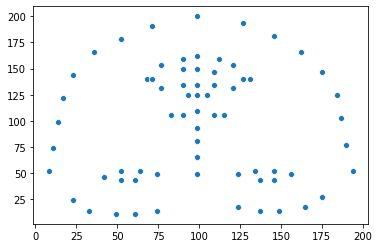

In [189]:
input = io.imread(list(faceimgdir.iterdir())[0])
preds = fa.get_landmarks(input)

preds = preds[0]
sns.scatterplot(x=[p[0] for p in preds], y=[p[1] for p in preds])